In [2]:
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from torch.utils.data import Dataset ,DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster, datasets
from sklearn.datasets import make_moons

In [3]:
def Generate_Line(fn, x):
    
    '''
    x is number of points wanted
    fn = [c,a,b] array input
    line: c + a*x + b*y = 0
    
    '''  
    assert not (fn[1]==0 and fn[2]==0), "coefficients for both x and y are zero"
    
    #x = np.linspace(-5,5,1000)
    
    if fn[2]!=0:
        
        y = -fn[1]/fn[2]*x-fn[0]/fn[2]
        
    else:
        
        y = x
        x = np.full_like(y, -fn[0]/fn[1])
        

    return x,y

def relu(x):
    return x * (x > 0)

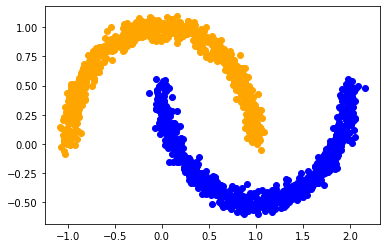

In [4]:
n_samples = 1500
X2,Y2 = datasets.make_moons(n_samples=n_samples, noise=0.05)


plt.scatter(X2[:, 0][Y2==1],X2[:, 1][Y2==1], color='b')
plt.scatter(X2[:, 0][Y2==0],X2[:, 1][Y2==0], color='orange')

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='A', ylabel='B'>

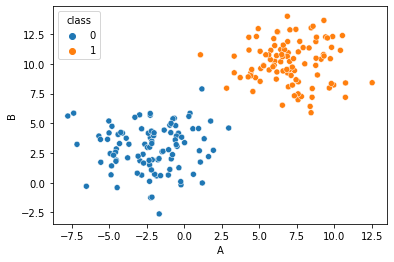

In [5]:
data = pd.read_csv("/users/kent/stadiset/Research Work/ReLU/score.csv")
data.head()

X = data.iloc[:,:-1].values

sns.scatterplot(data['A'],data['B'], hue = data['class'])

In [6]:
weights1 = np.array(([0.1532, -0.4506],
                     [-0.2035, -0.2523]))

weights2 = np.array(([ 0.3024,  0.1265],
                     [-0.5793,  2.8742]))

weights3 = np.array(([0.4654, -2.8651]))

bias1 = np.array(([-0.0394,  
                   2.9368]))

bias2 = np.array(([-4.3833e-01, 
                   -4.1123e-05]))

bias3 = np.array(([5.3234]))

print("======================================================================")

weights_1 = np.array(([1,0,0],
                     [-0.0394,0.1532, -0.4506],
                     [2.9368,-0.2035, -0.2523]))

weights_2 = np.array(([1,0,0],
                     [ -4.3833e-01,0.3024,  0.1265],
                     [-4.1123e-05,-0.5793,  2.8742]))

weights_3 = np.array(([1,0,0],
                     [5.3234,0.4654, -2.8651]))


# Transformation 1

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

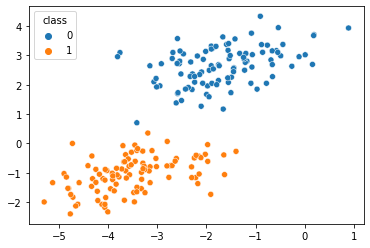

In [7]:
# x,y transormed points L1
t1 = []
for x in X:
    t1.append(np.matmul(weights_1,[1,x[0],x[1]]))

    
t1x = []
t1y = [] 
for i in t1:
    t1x.append(i[1]) #only transformed x
    t1y.append(i[2]) #only transformed y

sns.scatterplot(t1x,t1y, hue = data['class'])


/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

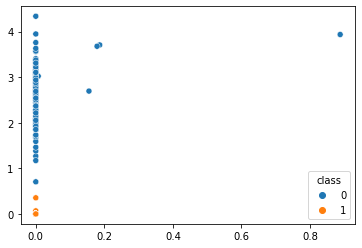

In [8]:
# Apply ReLU
#Apply Layer 1 Relu
t1xr = []
t1yr = []

for i in t1x:
    t1xr.append(relu(i))

for j in t1y:
    t1yr.append(relu(j))
    
sns.scatterplot(t1xr,t1yr, hue = data['class'])
# plt.plot(x11, y11, c ="g")
# plt.plot(x12, y12, c = "g")
#draw h3 and h4 hyperplanes on this diagram

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


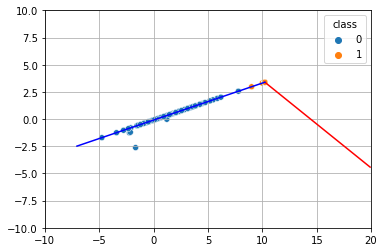

In [22]:
def pull_back_coordinate_axes(Matrix, bias, length):
    B = np.array([[length,0,1],
                  [0,length,1],
                  [0,   0,  1]]).T
    T = np.hstack((Matrix, bias[:, np.newaxis]))
    T = np.vstack((T, B[:,2]))
    T = np.linalg.inv(T)
    T = T.dot(B)
    x_axis = np.array([T[[0,1], 2], 
                       T[[0,1], 0]])
    y_axis = np.array([T[[0,1], 2], 
                       T[[0,1], 1]])
    return x_axis, y_axis


lx, ly = pull_back_coordinate_axes(weights1, bias1, 5)
fig, ax = plt.subplots()
sns.scatterplot(t1xo,t1yo, hue = data['class'])
ax.set_aspect('equal')
ax.plot(lx[:,0], lx[:,1], 'r')
ax.plot(ly[:,0], ly[:,1], 'b')
#ax.plot(X[:, 0], X[:, 1], 'yo')
plt.xlim(-10,20)
plt.ylim(-10,10)
plt.grid()
plt.show() 

In [10]:
lx

array([[10.22837149,  3.39011654],
       [19.90620214, -4.41582297]])

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


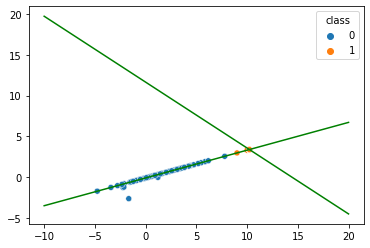

In [11]:
# Map back to input space and draw hyperplanes for layer 1

weights1_inverse = np.linalg.inv(weights_1)


#first define our hyperplanes after layer 1 transformation
s = 10
ss = np.linspace(-s,20, 100)
x11,y11 =Generate_Line([bias1[0],weights1[0][0],weights1[0][1]],ss)
x12,y12 = Generate_Line([bias1[1],weights1[1][0],weights1[1][1]],ss)

#Apple inverse on transformed points back into input space
t1_transformed = []
for i in range(200):
    t1_transformed.append([1,t1xr[i],t1yr[i]])

t1_inversed = []
for j in t1_transformed:
   t1_inversed.append(np.matmul(weights1_inverse,j))


t1xo = []
t1yo = []
for l in t1_inversed: 
    t1xo.append(l[1]) #only transformed x
    t1yo.append(l[2]) #only transformed y


sns.scatterplot(t1xo,t1yo, hue = data['class'])
# sns.scatterplot(data['A'],data['B'], hue = data['class'])
plt.plot(x11, y11, c ="g")
plt.plot(x12, y12, c = "g")


#Join this diagram with the original points as well in different color

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


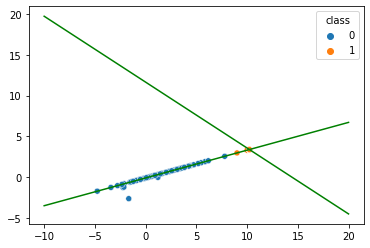

In [12]:
sns.scatterplot(t1xo,t1yo, hue = data['class'])
# sns.scatterplot(data['A'],data['B'], hue = data['class'])
plt.plot(x11, y11, c ="g")
plt.plot(x12, y12, c = "g")

# Transformation 2

In [13]:
#t1xr and t1yr continued 

#Act on t1xr and t1yr from previous layer
# x,y transormed points L2
t2 = []
for x in t1_transformed:
    t2.append(np.matmul(weights_2,x))
print(t2[0])
t2x = []
t2y = [] 
for i in t2:
    t2x.append(i[1]) #only transformed x
    t2y.append(i[2]) #only transformed y




#Apply ReLU to L2
t2xr = []
t2yr = []

for i in t2x:
    t2xr.append(relu(i))

for j in t2y:
    t2yr.append(relu(j))

[ 1.0000e+00 -4.3833e-01 -4.1123e-05]


/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

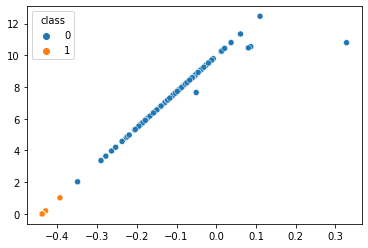

In [14]:
sns.scatterplot(t2x,t2y, hue = data['class'])

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

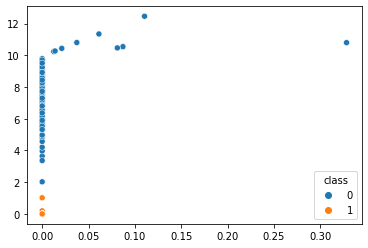

In [15]:
sns.scatterplot(t2xr,t2yr, hue = data['class'])

[[ 1.          0.          0.        ]
 [-0.07873936  0.02058493 -0.16817739]
 [ 8.46373386 -0.67364846 -0.46412808]]


/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


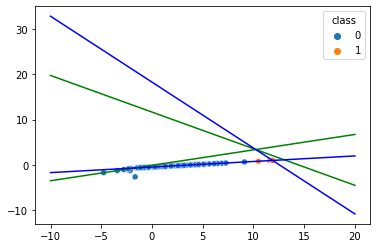

In [23]:
weights21 = np.matmul(weights_2,weights_1)
# Map back to input space and draw hyperplanes for layer 2

weights2_inverse = np.linalg.inv(weights_2)
weights21 = np.matmul(weights_2, weights_1)
print(weights21)
#first define our hyperplanes after layer 2 transformation
s = 10
ss = np.linspace(-s,20, 1000)
x21,y21 =Generate_Line([weights21[1][0],weights21[1][1],weights21[1][2]],ss)
x22,y22 = Generate_Line([weights21[2][0],weights21[2][1],weights21[2][2]],ss)

#Apply inverse on transformed points back into input space
t2_transformed = []
for i in range(200):
    t2_transformed.append([1,t2xr[i],t2yr[i]])

t2_inversed = []
for j in t2_transformed:
   t2_inversed.append(np.matmul(weights1_inverse,np.matmul(weights2_inverse,j)))


t2xo = []
t2yo = []
for l in t2_inversed: 
    t2xo.append(l[1]) #only transformed x
    t2yo.append(l[2]) #only transformed y


sns.scatterplot(t2xo,t2yo, hue = data['class'])
plt.plot(x11, y11, c ="g")
plt.plot(x12, y12, c = "g")
plt.plot(x21, y21, c ="b")
plt.plot(x22, y22, c = "b")


# Transformation 3

In [17]:
print(weights_3.shape)
print(np.array(t2_transformed[0]).shape)

(2, 3)
(3,)


In [18]:
weights31 = np.matmul(weights_3,(np.matmul(weights_2, weights_1)))
print(weights31)

[[  1.           0.           0.        ]
 [-18.96268917   1.93965043   1.2515036 ]]


/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


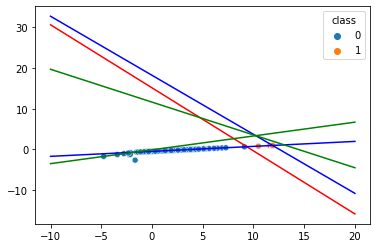

In [19]:
# Apply on t2xr and t2yr
# weights3_inverse = np.linalg.inv(weights_3)
#Act on t1xr and t1yr from previous layer
# x,y transormed points L2
t3 = []
for x in t2_transformed:
    t3.append(np.matmul(weights_3,x))

# t3x = []
# t3y = [] 
# for i in t3:
#     t3x.append(i[1]) #only transformed x

# #first define our hyperplanes after layer 2 transformation
s = 10
ss = np.linspace(-s,20, 1000)
x31,y31 =Generate_Line([weights31[1][0],weights31[1][1],weights31[1][2]],ss)

#remove negatives
ls=[]
ls2=[]
for i in range(1000):
    ls.append([x31[i],y31[i]])
for i in ls:
    if (i[0]<0 and i[1]>0) or ((i[0]>0 and i[1]<0)) or (i[0]<0 and i[1]<0):
        ls2.append(i)


# # sns.scatterplot(t3x,t3y, hue = data['class'])

sns.scatterplot(t2xo,t2yo, hue = data['class'])
plt.plot(x31, y31, c ="r")
plt.plot(x21, y21, c ="b")
plt.plot(x22, y22, c = "b")
plt.plot(x11, y11, c ="g")
plt.plot(x12, y12, c = "g")

In [20]:
print(x11)
print(x21)

[-10.          -9.6969697   -9.39393939  -9.09090909  -8.78787879
  -8.48484848  -8.18181818  -7.87878788  -7.57575758  -7.27272727
  -6.96969697  -6.66666667  -6.36363636  -6.06060606  -5.75757576
  -5.45454545  -5.15151515  -4.84848485  -4.54545455  -4.24242424
  -3.93939394  -3.63636364  -3.33333333  -3.03030303  -2.72727273
  -2.42424242  -2.12121212  -1.81818182  -1.51515152  -1.21212121
  -0.90909091  -0.60606061  -0.3030303    0.           0.3030303
   0.60606061   0.90909091   1.21212121   1.51515152   1.81818182
   2.12121212   2.42424242   2.72727273   3.03030303   3.33333333
   3.63636364   3.93939394   4.24242424   4.54545455   4.84848485
   5.15151515   5.45454545   5.75757576   6.06060606   6.36363636
   6.66666667   6.96969697   7.27272727   7.57575758   7.87878788
   8.18181818   8.48484848   8.78787879   9.09090909   9.39393939
   9.6969697   10.          10.3030303   10.60606061  10.90909091
  11.21212121  11.51515152  11.81818182  12.12121212  12.42424242
  12.727272